## Project Stage - II (Data Modeling and Hypothesis Testing)

## Goals

The goal of Stage II is to develop formal hypothesis tests for the intuitions you had in Stage I and utilize statistical modeling to prove/disprove them.

### Tasks:

#### Task 1: (50 pts)
- Team: (25)
    - Compare the weekly statistics (mean, median, mode) for number of new cases and deaths across US. You are calculating mean (rounded to integer value) number of new cases  per week and then calculating (mean, median, mode) for all week taken together. 
    - Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
        - Choose atleast 5 similar populations countries to compare. 
    - Plot daily trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population (ex: number of cases per 100,000), difference in cases (new cases), and log normalized values. 
    - Identify peak week of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, etc).
- Member: (25 pts)
    - Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state. 
    - Compare the data against other states. (normalize by population)
    - Identify counties within the previous state with high case and death rates. (normalize by population)
    - Plot daily trends (new cases and deaths) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values. 
    
#### Task 2: (50 pts)
- Member:
    - Fit a distribution to the number of COVID-19 **new** cases of a state of your choosing. 
        - Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
        - Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
        - Compare the distribution and its statistics to 5 other states of your choosing. 
    - Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, number of new cases and deaths per 100,000 population. Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points. 
    - Model poission distributions for North Carolina counties COVID-19 in cases and deaths. For example, number of new cases and deaths per 100,000 populations. 
    
    - Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.
        - You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases. 
    - Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. 
        - For example: *Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.* 


**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Presentation recordings on canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage IV. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

## Deadline: 10/21/2021

## Read the data 

In [4]:
#Now lets import the libraries
import pandas as pd
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson
import scipy.stats  as stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
from IPython.display import Image
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv("D:/Kiptaror/CSC-405-605_Fall_2021-master/data/owid-covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133494,ZWE,Africa,Zimbabwe,2021-11-11,133329.0,27.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133495,ZWE,Africa,Zimbabwe,2021-11-12,133329.0,0.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133496,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133497,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133499 entries, 0 to 133498
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    133499 non-null  object 
 1   continent                                   124973 non-null  object 
 2   location                                    133499 non-null  object 
 3   date                                        133499 non-null  object 
 4   total_cases                                 126238 non-null  float64
 5   new_cases                                   126236 non-null  float64
 6   new_cases_smoothed                          125193 non-null  float64
 7   total_deaths                                115089 non-null  float64
 8   new_deaths                                  115285 non-null  float64
 9   new_deaths_smoothed                         125193 non-null  float64
 

In [11]:
data['date'] = data.date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

KeyError: "None of [Index(['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',\n       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',\n       'Afghanistan', 'Afghanistan',\n       ...\n       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',\n       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],\n      dtype='object', length=133499)] are in the [columns]"

In [13]:
FL_state

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


## Compare the weekly statistics (mean, median, mode)

In [8]:
average = data['weekly_icu_admissions'].mean()
print(average)

med = data['weekly_icu_admissions'].median()
print(med)

228.8865339299028
29.083


In [9]:
average = data['weekly_icu_admissions_per_million'].mean()
print(average)

med = data['weekly_icu_admissions_per_million'].median()
print(med)

16.385820283370684
5.57


In [ ]:
average = data['weekly_icu_admissions_per_million'].mean()
print(average)

med = data['weekly_icu_admissions_per_million'].median()
print(med)

In [10]:
average = data['weekly_hosp_admissions'].mean()
print(average)

med = data['weekly_hosp_admissions'].median()
print(med)

3096.795492488262
256.70050000000003


In [11]:
average = data['weekly_hosp_admissions_per_million'].mean()
print(average)

med = data['weekly_hosp_admissions_per_million'].median()
print(med)

84.14998356807511
36.046


## Compare the data against other countries of the world

## Plot daily trends (cases and deaths) of US and compare other countries.

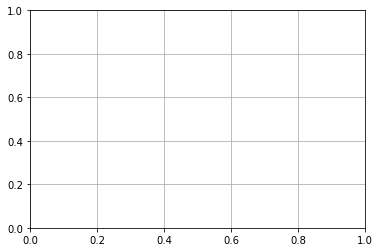

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.show()

## Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.